# Regular expressions (aka regexps)

The task is concentrated on using regular expressions for extracting basic information from textual data. You will get more familiar with the regexp features that are particularly important in natural language processing.

## Load bills

In [220]:
import os
import functools
import re

year_regex = "u\s*s\s*t\s*a\s*w\s*a\s*(konstytucyjna|budżetowa\s+na\s+rok\s+\d{4})?\s+z\s+dnia\s+\d+\s+\w+\s+(\d{4})(?=\s+r\.)"

bills = []
years = []
for file in os.listdir('ustawy'):
    f = open("ustawy/"+file,"r", encoding="utf8")
    text = functools.reduce(lambda a,b: a + b, f.readlines())
    search = re.search(year_regex, text.lower())
    if search is None:
        year = file.split('_')[0]
        print(file, 'has not defined year in text')
    else:    
        year = search.group(2)
    bills.append(text)
    years.append(int(year))   

1996_400.txt has not defined year in text


## Util functions

In [221]:
import re

def count_occurrences(pattern, text):
    return len(re.findall(pattern, text))

def count_occurrences_in_bill(pattern, bill_name):
    f = open("ustawy/"+bill_name,"r", encoding="utf8")
    return count_occurrences(pattern, functools.reduce(lambda a,b: a + b, f.readlines()))

def count_occurrences_in_all_bills(pattern):
    occurrences = 0
    for bill in bills:
        occurrences += count_occurrences(pattern, bill)
    return occurrences    

def count_per_year(pattern):
    occurrences_per_year = {}
    for i in range(len(bills)):
        occurrences = count_occurrences(pattern, bills[i])
        year = years[i]
        if year not in occurrences_per_year:
            occurrences_per_year[year] = occurrences
        else:
            occurrences_per_year[year] += occurrences
    return occurrences_per_year        

## For each bill compute the number of addition of a unit

In [263]:
addition_regex = 'dodaje\s+się\s+(ust\.|lit\.|pkt|§|art\.)\s+\d+'
additions = count_per_year(addition_regex)

## For each bill compute the number of removal of a unit

In [264]:
removal_regex = 'w\s+)(ust\.|lit\.|pkt|§|art\.).*skreśla się'
removals = count_per_year(removal_regex)

## For each bill compute the number of change of a unit

In [265]:
change_regex = '(ust\.|lit\.|pkt|§|art\.).*otrzymuje brzmienie'
changes = count_per_year(change_regex)

## Compare results per year

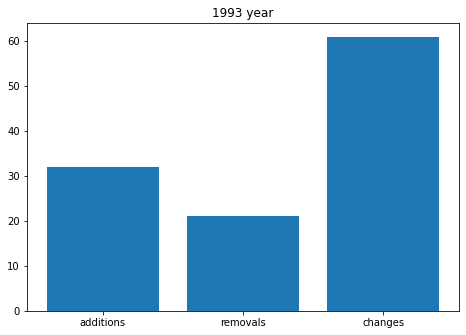

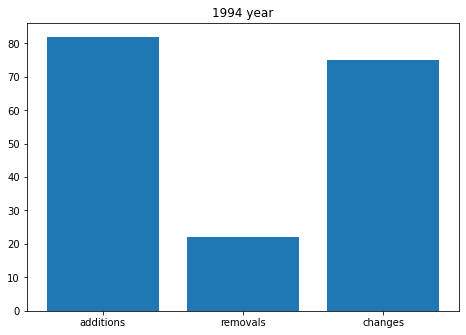

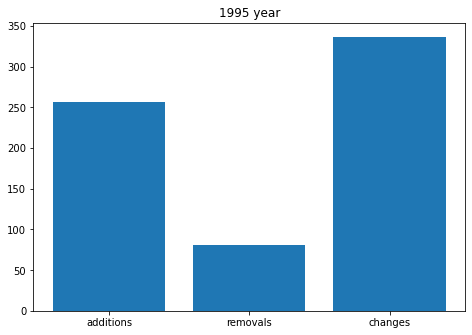

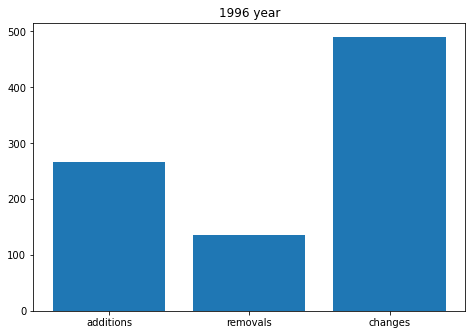

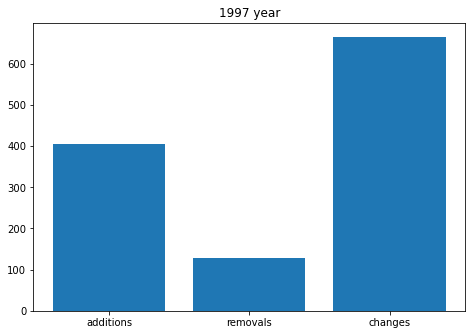

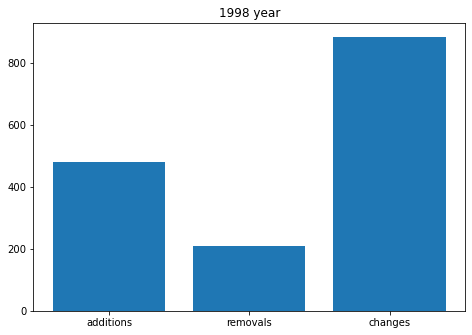

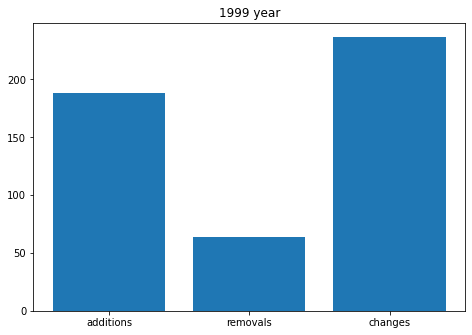

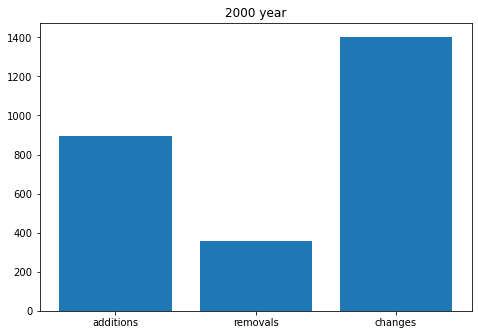

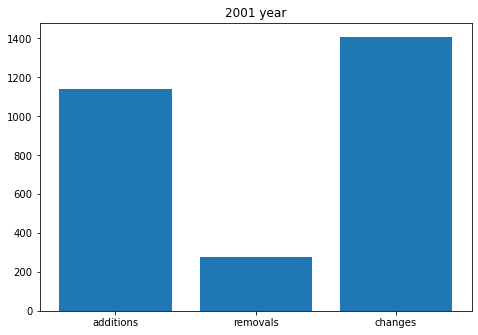

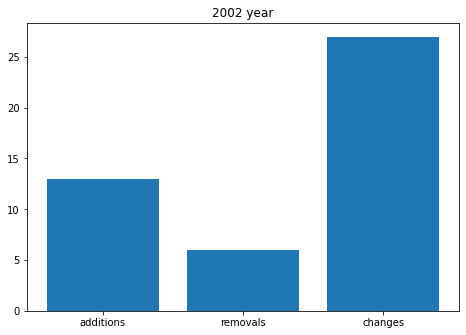

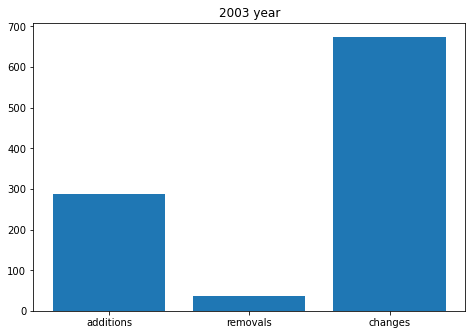

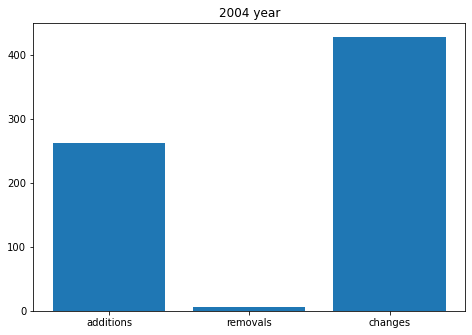

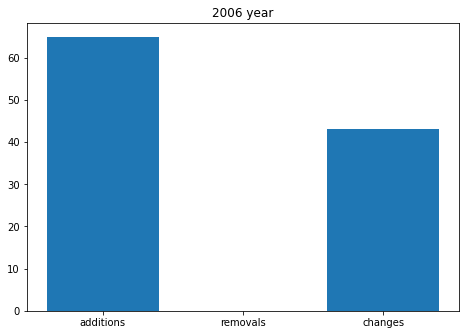

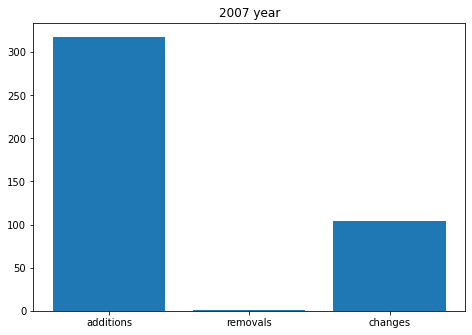

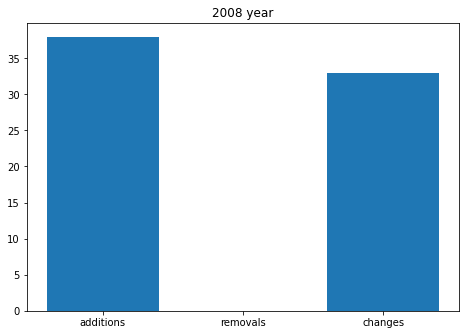

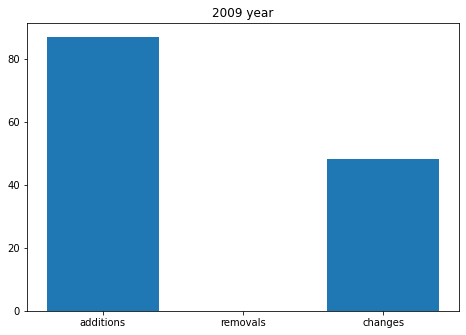

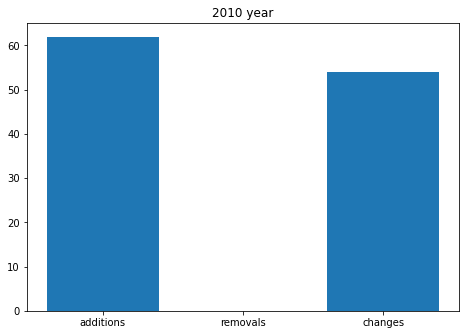

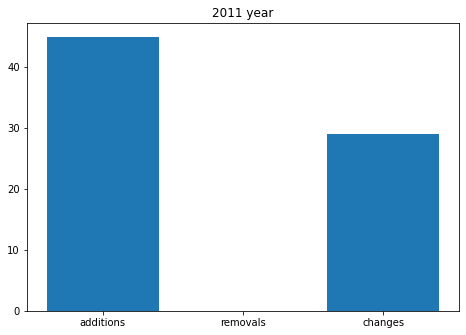

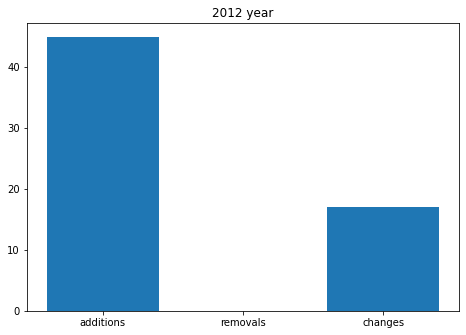

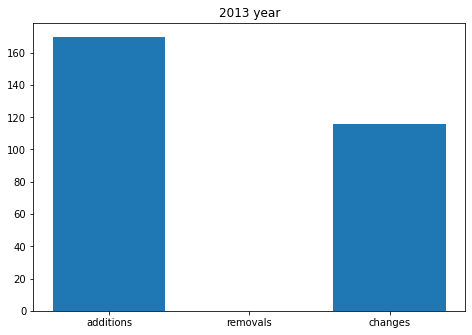

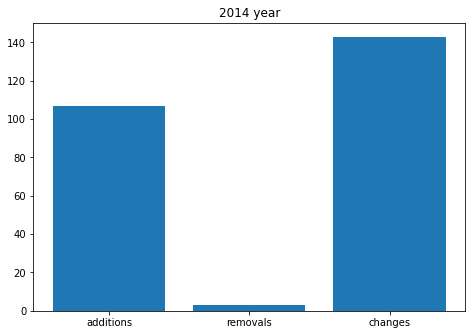

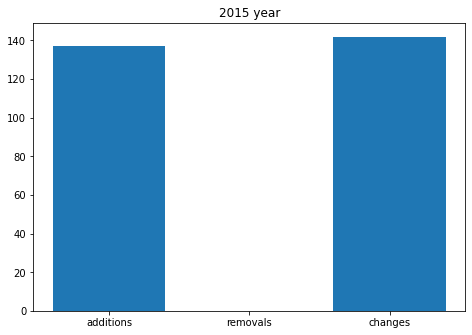

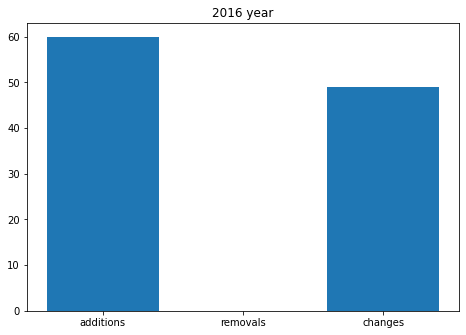

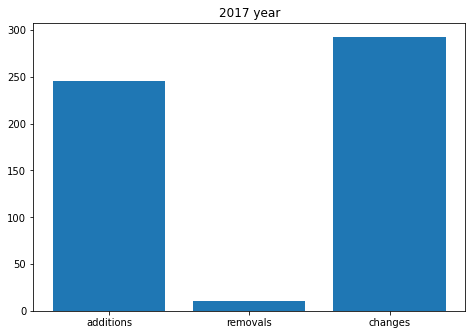

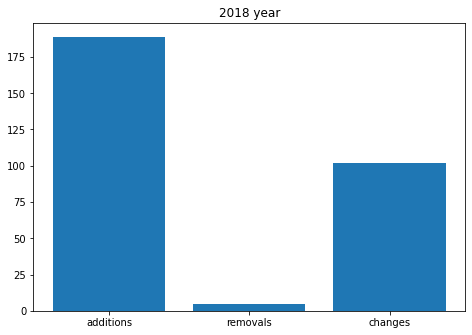

In [266]:
import matplotlib.pyplot as plt

for year in set(years):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    operations = ['additions', 'removals', 'changes']
    values = [additions[year],removals[year],changes[year]]
    ax.bar(operations,values)
    ax.set_title(str(year) + ' year')
    plt.show()  

## Compute the total number of occurrences of the word 'ustawa' in any inflectional form

In [262]:
ustawa_regex = "(ustaw(om|ami|ach|a|y|ie|ę|ą|o|y))"

acc = ""

for ch in ustawa_regex:
    if ch.isalpha():
        acc += "(" + ch + "|" + ch.upper() + ")"
    else:
        acc += ch

ustawa_regex = "\\b" + acc + "\\b"
print("regex for ustawa:\n", ustawa_regex)
ustawa_occurrences = count_occurrences_in_all_bills(ustawa_regex)
ustawa_occurrences

regex for ustawa:
 \b((u|U)(s|S)(t|T)(a|A)(w|W)((o|O)(m|M)|(a|A)(m|M)(i|I)|(a|A)(c|C)(h|H)|(a|A)|(y|Y)|(i|I)(e|E)|(ę|Ę)|(ą|Ą)|(o|O)|(y|Y)))\b


24025

## Compute the total number of occurrences of the word 'ustawa' followed by 'z dnia' expression

In [256]:
ustawa_z_dnia_regex = "(" + ustawa_regex + ")(?=\s+z dnia\\b)"
ustawa_z_dnia = count_occurrences_in_all_bills(ustawa_z_dnia_regex)
ustawa_z_dnia

8101

## Compute the total number of occurrences of the word 'ustawa' not followed by 'z dnia' expression

In [257]:
ustawa_not_z_dnia_regex = "(" + ustawa_regex + ")(?!\s+z dnia\\b)"
ustawa_not_z_dnia = count_occurrences_in_all_bills(ustawa_not_z_dnia_regex)
ustawa_not_z_dnia

15924

In [258]:
assert(ustawa_occurrences == ustawa_z_dnia + ustawa_not_z_dnia)

## Compute the total number of occurrences of the word 'ustawa' in any inflectional form, excluding occurrences following 'o zmianie' expression

In [259]:
o_zmianie_ustawa_regex = "(?<!\bo zmianie)\s(" + ustawa_regex + ")"
count_occurrences_in_all_bills(o_zmianie_ustawa_regex)

23939

#### Wykonał Mikołaj Sikora (grupa piątek 12:50)